## Main Task
**Netflix Content Strategy Analysis** we need data based on content titles, type (show or movie), genre, language, and release details (date, day of the week, season) to understand timing and content performance!  

**Content Strategy Analysis** means analyzing how content is created, released, distributed, and consumed to achieve specific goals, such as maximizing audience engagement, viewership, brand reach, or revenue!

### Data Understanding
The dataset consists of Netflix content released globally in 2023, containing information on the title, release date, language, content type (show or movie), availability status, and viewership hours.

In [48]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from scipy.stats import ttest_ind

In [3]:
dataset = pd.read_csv('datasets/netflix_content_2023.csv')

In [4]:
dataset.head()

,Title,Available Globally?,Release Date,Hours Viewed,Language Indicator,Content Type
0,The Night Agent: Season 1,Yes,2023-03-23,"81,21,00,000",English,Show
1,Ginny & Georgia: Season 2,Yes,2023-01-05,"66,51,00,000",English,Show
2,The Glory: Season 1 // 더 글로리: 시즌 1,Yes,2022-12-30,"62,28,00,000",Korean,Show
3,Wednesday: Season 1,Yes,2022-11-23,"50,77,00,000",English,Show
4,Queen Charlotte: A Bridgerton Story,Yes,2023-05-04,"50,30,00,000",English,Movie


In [5]:
dataset.columns

Index(['Title', 'Available Globally?', 'Release Date', 'Hours Viewed',
       'Language Indicator', 'Content Type'],
      dtype='object')

In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24812 entries, 0 to 24811
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Title                24812 non-null  object
 1   Available Globally?  24812 non-null  object
 2   Release Date         8166 non-null   object
 3   Hours Viewed         24812 non-null  object
 4   Language Indicator   24812 non-null  object
 5   Content Type         24812 non-null  object
dtypes: object(6)
memory usage: 1.1+ MB


In [7]:
dataset.isnull().sum()

Title                      0
Available Globally?        0
Release Date           16646
Hours Viewed               0
Language Indicator         0
Content Type               0
dtype: int64

### Maximize Viewer Engagement
#### Which titles have the highest and lowest 'Hours Viewed'?

In [8]:
# Preprocessing the 'Hours Viewed' column
dataset['Hours Viewed'] = dataset['Hours Viewed'].replace(',', '', regex=True).astype(float)

In [9]:
dataset.head()

,Title,Available Globally?,Release Date,Hours Viewed,Language Indicator,Content Type
0,The Night Agent: Season 1,Yes,2023-03-23,812100000.0,English,Show
1,Ginny & Georgia: Season 2,Yes,2023-01-05,665100000.0,English,Show
2,The Glory: Season 1 // 더 글로리: 시즌 1,Yes,2022-12-30,622800000.0,Korean,Show
3,Wednesday: Season 1,Yes,2022-11-23,507700000.0,English,Show
4,Queen Charlotte: A Bridgerton Story,Yes,2023-05-04,503000000.0,English,Movie


In [10]:
# Sort the dataset by 'Hours Viewed' in ascending order
sorted_dataset = dataset.sort_values(by='Hours Viewed')

# Select the top 3 least viewed and top 3 most viewed titles
least_viewed = sorted_dataset.head(3)
most_viewed = sorted_dataset.tail(3)

In [11]:
print("Most Viewed Titles: ")
most_viewed.head()

Most Viewed Titles: 


,Title,Available Globally?,Release Date,Hours Viewed,Language Indicator,Content Type
18227,King the Land: Limited Series // 킹더랜드: 리미티드 시리즈,Yes,2023-06-17,630200000.0,Korean,Movie
1,Ginny & Georgia: Season 2,Yes,2023-01-05,665100000.0,English,Show
0,The Night Agent: Season 1,Yes,2023-03-23,812100000.0,English,Show


In [12]:
print("Least Viewed Titles: ")
least_viewed.head()

Least Viewed Titles: 


,Title,Available Globally?,Release Date,Hours Viewed,Language Indicator,Content Type
24811,Zach Galifianakis: Live at the Purple Onion,No,NaN,100000.0,English,Movie
15898,Jay and Silent Bob Strike Back,No,NaN,100000.0,English,Movie
15897,Jay and Silent Bob Reboot,No,NaN,100000.0,English,Movie


#### How does 'Content Type' (e.g., movie, series) correlate with 'Hours Viewed'?

In [13]:
# Group by 'Content Type' and calculate the mean 'Hours Viewed'
content_type_grouped = dataset.groupby('Content Type')['Hours Viewed'].mean().reset_index()

# Sort the values for better visualization
content_type_grouped = content_type_grouped.sort_values(by='Hours Viewed', ascending=False)

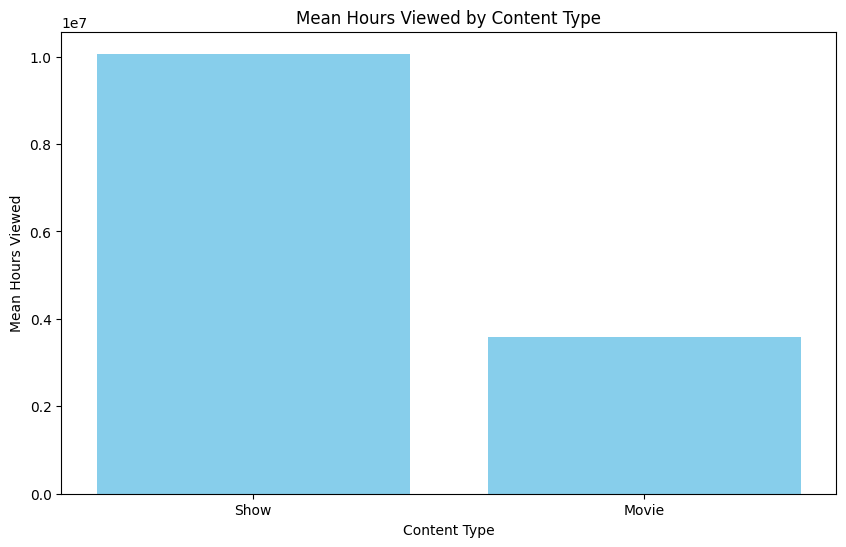

In [14]:
# Plotting the bar chart
plt.figure(figsize=(10, 6))
plt.bar(content_type_grouped['Content Type'], content_type_grouped['Hours Viewed'], color='skyblue')
plt.xlabel('Content Type')
plt.ylabel('Mean Hours Viewed')
plt.title('Mean Hours Viewed by Content Type')
plt.show()

> The visualization indicates that shows dominate the total viewership hours on Netflix in 2023 compared to movies.  
This suggests that Netflix’s content strategy leans heavily toward shows, as they tend to attract more watch hours overall!  

#### What are the trends in 'Hours Viewed' across different 'Release Dates'?

In [17]:
# Convert 'Release Date' from string to datetime format
dataset['Release Date'] = pd.to_datetime(dataset['Release Date'])
# Extract year from 'Release Date'
dataset['Release Year'] = dataset['Release Date'].dt.year

In [19]:
# Group by 'Release Year' and calculate the mean 'Hours Viewed'
yearly_trends = dataset.groupby('Release Year')['Hours Viewed'].mean().reset_index()

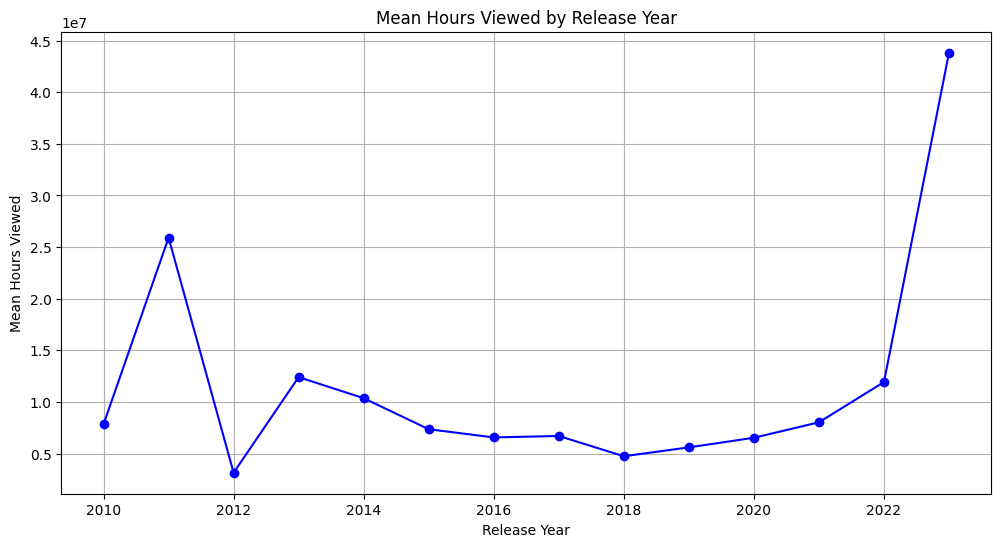

In [20]:
# Plotting the trend
plt.figure(figsize=(12, 6))
plt.plot(yearly_trends['Release Year'], yearly_trends['Hours Viewed'], marker='o', linestyle='-', color='blue')
plt.xlabel('Release Year')
plt.ylabel('Mean Hours Viewed')
plt.title('Mean Hours Viewed by Release Year')
plt.grid(True)
plt.show()

> There is an early surge from 2010 to 2011, which likely indicates the release of highly engaging content that captivated audiences. This is followed by a significant drop in 2012, possibly due to less engaging content or external factors impacting viewership. From 2013 to 2022, we observe a period of recovery and stabilization, suggesting the establishment of a steady audience and consistent quality content. Finally, 2023 stands out with a remarkable spike, which could be attributed to a breakout hit, changes in distribution strategies, or broader trends like increased screen time!  

#### Does the 'Language Indicator' affect the 'Hours Viewed' significantly?

In [21]:
# Group by 'Language Indicator' and calculate the mean 'Hours Viewed'
language_grouped = dataset.groupby('Language Indicator')['Hours Viewed'].mean().reset_index()
# Sort the values for better visualization
language_grouped = language_grouped.sort_values(by='Hours Viewed', ascending=False)

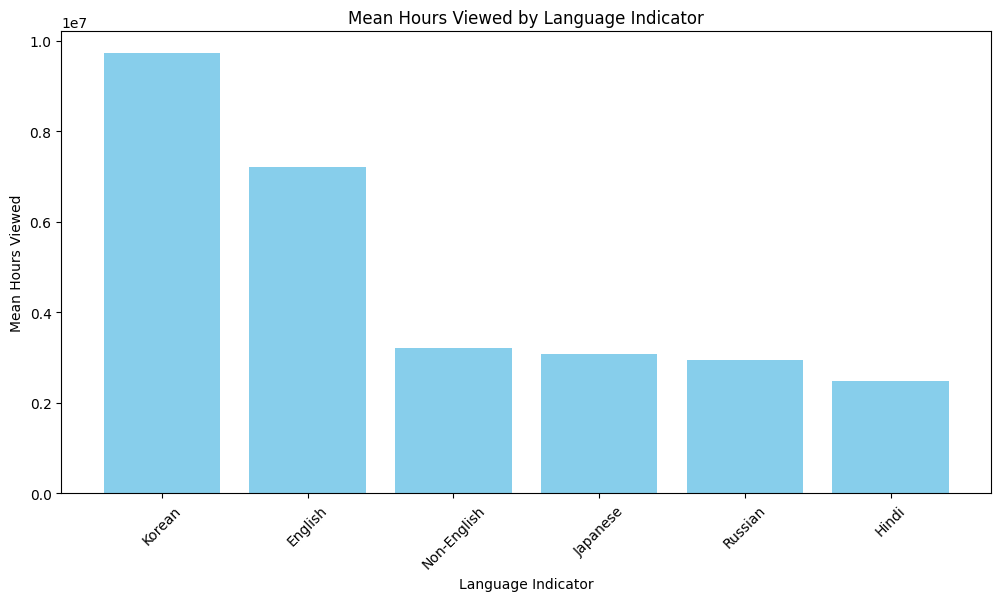

In [22]:
# Plotting the bar chart
plt.figure(figsize=(12, 6))
plt.bar(language_grouped['Language Indicator'], language_grouped['Hours Viewed'], color='skyblue')
plt.xlabel('Language Indicator')
plt.ylabel('Mean Hours Viewed')
plt.title('Mean Hours Viewed by Language Indicator')
plt.xticks(rotation=45)
plt.show()

> The analysis shows a clear preference for Korean content, with the highest average 'Hours Viewed'. English content follows closely. This trend highlights the significant engagement levels for Korean and English content compared to other languages. Non-English, Japanese, and Russian content have similar viewership, indicating moderate engagement, while Hindi content has slightly lower engagement.

##### Performing ANOVA test
**ANOVA (Analysis of Variance)**: ANOVA is a statistical test used to compare the means of three or more groups to see if there are significant differences among them. It helps to determine if the observed differences in sample data are due to actual differences in the population or just due to random chance!   
We used ANOVA to determine if the 'Language Indicator' significantly affects 'Hours Viewed' by comparing the average 'Hours Viewed' across different language groups!  
**F-statistic**: The F-statistic is a value calculated during ANOVA that compares the variation between group means to the variation within the groups. A higher F-statistic value suggests that the group means are significantly different from each other!  

Hypotheses:  

**Null Hypothesis (H0)**: There is no significant difference in the mean 'Hours Viewed' among different language groups. In other words, the language of the content does not affect viewership.  
**Alternative Hypothesis (H1)**: There is a significant difference in the mean 'Hours Viewed' among different language groups. In other words, the language of the content does affect viewership.  


In [ ]:
# Perform ANOVA test
anova_result = stats.f_oneway(*[dataset[dataset['Language Indicator'] == lang]['Hours Viewed'] for lang in dataset['Language Indicator'].unique()])

print('ANOVA F-statistic:', anova_result.statistic)
print('ANOVA p-value:', anova_result.pvalue)

ANOVA F-statistic: 43.96747954216327
ANOVA p-value: 2.578724948282694e-45


> With an F-statistic of 43.97 and a p-value of approximately 2.58*10^{-45}, the p-value is significantly less than 0.05. This indicates that there are statistically significant differences in 'Hours Viewed' across different 'Language Indicator' groups.  
In other words, the language of the content does have a significant effect on viewership!

### Optimize Global Reach
#### How does global availability ('Available Globally?') impact 'Hours Viewed'?

In [24]:
# Group by 'Available Globally?' and calculate the mean 'Hours Viewed'
global_availability_grouped = dataset.groupby('Available Globally?')['Hours Viewed'].mean().reset_index()

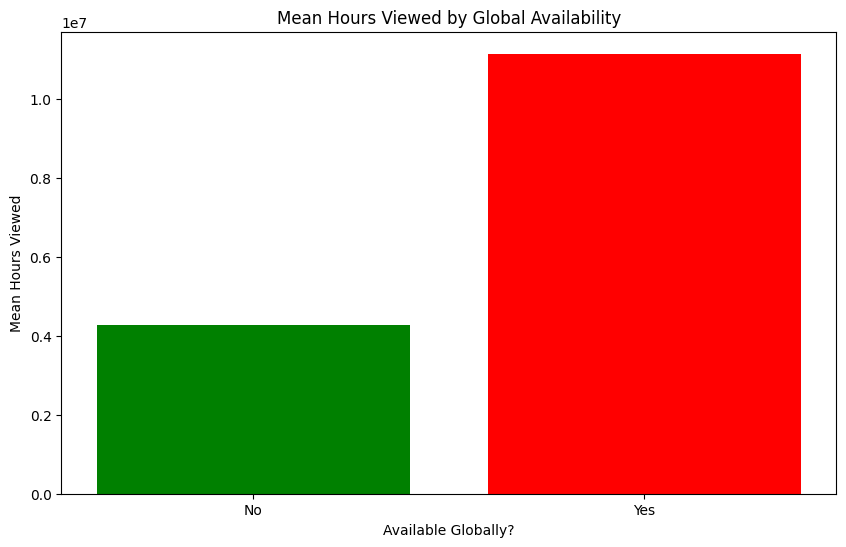

In [25]:
# Plotting the bar chart
plt.figure(figsize=(10, 6))
plt.bar(global_availability_grouped['Available Globally?'], global_availability_grouped['Hours Viewed'], color=['green', 'red'])
plt.xlabel('Available Globally?')
plt.ylabel('Mean Hours Viewed')
plt.title('Mean Hours Viewed by Global Availability')
plt.show()

> Average hours viewed of global available content is much more than the those that are not!  

**T-test**: A T-test is a statistical test that compares the means of two groups to determine if they are significantly different from each other. It helps to see if any observed differences in sample data are likely due to actual differences in the population or just random chance!  
'Available Globally?' is a categorical feature (with values 'Yes' or 'No'), and 'Hours Viewed' is a numerical feature.  
The T-test is suitable for this scenario because it compares the average 'Hours Viewed' between the two groups (globally available vs. not globally available content) to check if the difference is statistically significant.

Hypotheses:

**Null Hypothesis (H0)**: There is no significant difference in the mean 'Hours Viewed' between content that is available globally and content that is not. In other words, global availability does not impact viewership.  
**Alternative Hypothesis (H1)**: There is a significant difference in the mean 'Hours Viewed' between content that is available globally and content that is not. In other words, global availability does impact viewership.  


In [27]:
# Perform t-test
# Separate the data into two groups
global_yes = dataset[dataset['Available Globally?'] == 'Yes']['Hours Viewed']
global_no = dataset[dataset['Available Globally?'] == 'No']['Hours Viewed']

In [28]:
# Perform the t-test
t_test_result = ttest_ind(global_yes, global_no)

print('T-test statistic:', t_test_result.statistic)
print('T-test p-value:', t_test_result.pvalue)

T-test statistic: 24.51564065845156
T-test p-value: 3.6607369768462507e-131


> The T-test results are quite revealing. With a T-test statistic of approximately 24.52 and an incredibly low p-value of 3.66 * 10^{-131}, this strongly suggests that there is a statistically significant difference in 'Hours Viewed' between content that is available globally and content that is not!  
In other words, global availability has a significant impact on viewership. The extremely low p-value indicates that the observed difference in mean 'Hours Viewed' is not due to random chance, and we can confidently reject the null hypothesis.

#### Which titles that are 'Available Globally?' have the highest 'Hours Viewed'?

In [36]:
# Filter the dataset to only include titles that are 'Available Globally?'
global_content = dataset[dataset['Available Globally?'] == 'Yes']

# Sort the filtered dataset by 'Hours Viewed' in descending order
sorted_global_titles = global_content.sort_values(by='Hours Viewed', ascending=False)

In [37]:
# Get the top 5 titles
top_5_global_titles = sorted_global_titles.head(5)

# Display the top 5 titles
top_5_global_titles[['Title', 'Hours Viewed']]

,Title,Hours Viewed
0,The Night Agent: Season 1,812100000.0
1,Ginny & Georgia: Season 2,665100000.0
18227,King the Land: Limited Series // 킹더랜드: 리미티드 시리즈,630200000.0
2,The Glory: Season 1 // 더 글로리: 시즌 1,622800000.0
18214,ONE PIECE: Season 1,541900000.0


#### How do 'Release Dates' affect 'Hours Viewed' for globally versus locally available content?

In [38]:
# Filter the dataset into two groups
local_content = dataset[dataset['Available Globally?'] == 'No']

In [41]:
# Group by 'Release Date' and calculate the mean 'Hours Viewed' for each group
global_trends = global_content.groupby('Release Year')['Hours Viewed'].mean().reset_index()
local_trends = local_content.groupby('Release Year')['Hours Viewed'].mean().reset_index()

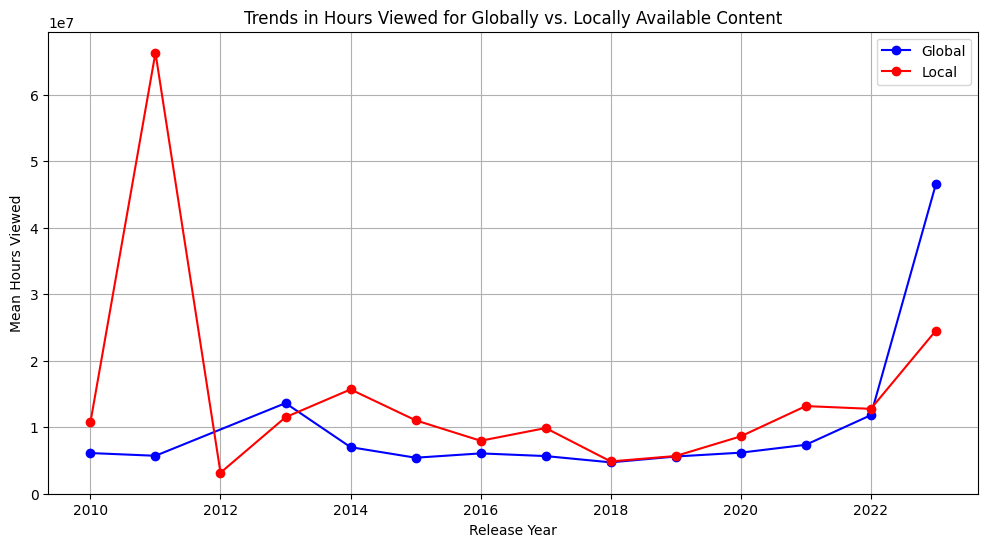

In [44]:
# Plotting the trends
plt.figure(figsize=(12, 6))
plt.plot(global_trends['Release Year'], global_trends['Hours Viewed'], marker='o', linestyle='-', color='blue', label='Global')
plt.plot(local_trends['Release Year'], local_trends['Hours Viewed'], marker='o', linestyle='-', color='red', label='Local')
plt.xlabel('Release Year')
plt.ylabel('Mean Hours Viewed')
plt.title('Trends in Hours Viewed for Globally vs. Locally Available Content')
plt.legend()
plt.grid(True)
plt.show()

> For locally available content, there's a dramatic rise from 2010-2011, followed by a steep decline in 2012. Viewership stabilizes between 2013 and 2022, with a significant increase in 2023. In contrast, global content sees a slight rise in 2013, a steady decline until 2022, and a substantial surge in 2023.  
This suggests that while local content experienced fluctuating engagement, global content maintained a more stable but lower viewership until a major boost in 2023, possibly due to a global hit or increased accessibility.  

#### Is there a noticeable trend in 'Hours Viewed' for content 'Available Globally?' in particular languages?

In [45]:
# Group by 'Language Indicator' and calculate the mean 'Hours Viewed'
language_trends = global_content.groupby('Language Indicator')['Hours Viewed'].mean().reset_index()

# Sort the values for better visualization
language_trends = language_trends.sort_values(by='Hours Viewed', ascending=False)

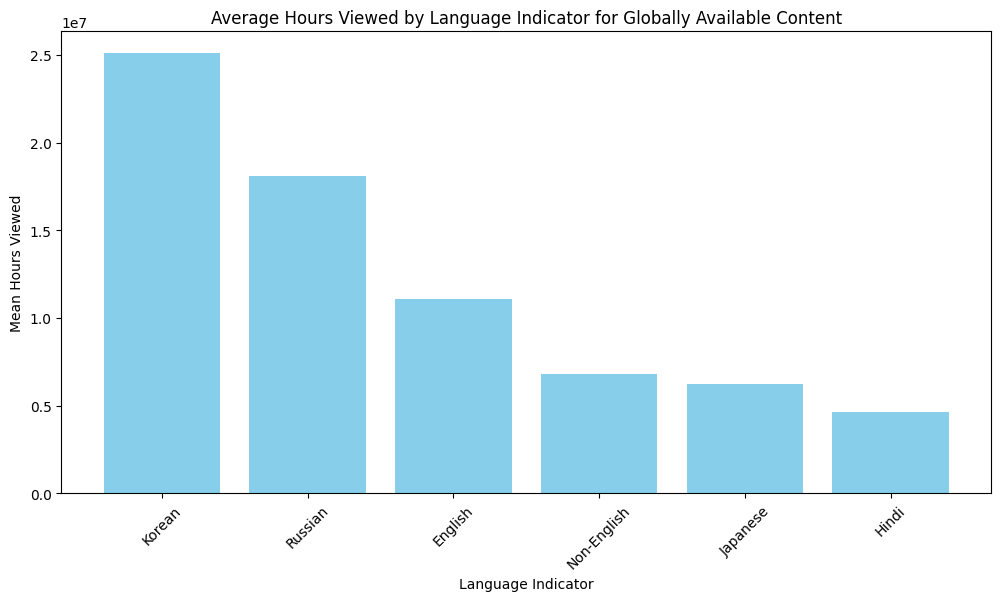

In [47]:
# Plotting the bar chart
plt.figure(figsize=(12, 6))
plt.bar(language_trends['Language Indicator'], language_trends['Hours Viewed'], color='skyblue')
plt.xlabel('Language Indicator')
plt.ylabel('Mean Hours Viewed')
plt.title('Average Hours Viewed by Language Indicator for Globally Available Content')
plt.xticks(rotation=45)
plt.show()

> This trend indicates a strong preference for Korean content, with moderate engagement for Russian and English, while the other languages have comparatively lower viewership but are closely aligned with each other.  
These insights can help content creators and distributors focus on languages with higher engagement or explore strategies to boost viewership in other languages.

### Tailor Language Offerings
#### How does 'Language Indicator' interact with 'Content Type' to influence 'Hours Viewed'?

In [49]:
# Group by 'Language Indicator' and 'Content Type' and calculate the mean 'Hours Viewed'
interaction_grouped = dataset.groupby(['Language Indicator', 'Content Type'])['Hours Viewed'].mean().reset_index()

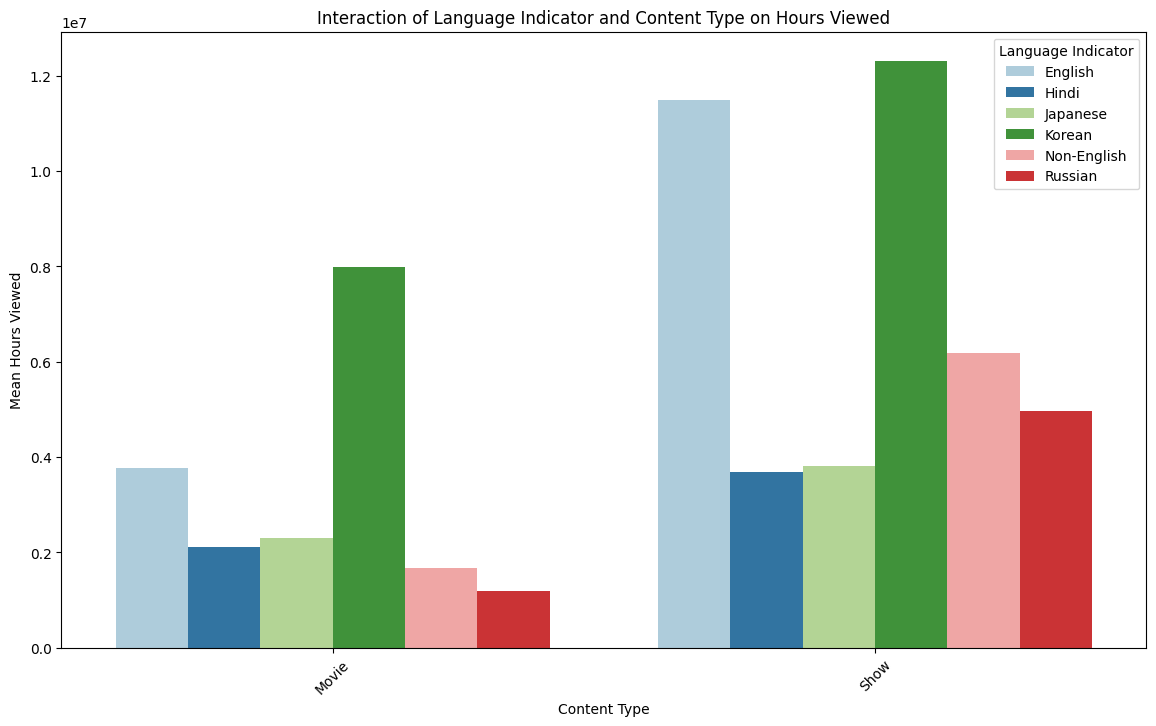

In [55]:
# Plotting a bar chart to visualize the interaction
plt.figure(figsize=(14, 8))
sns.barplot(x='Content Type', y='Hours Viewed', hue='Language Indicator', data=interaction_grouped, palette='Paired')
plt.xlabel('Content Type')
plt.ylabel('Mean Hours Viewed')
plt.title('Interaction of Language Indicator and Content Type on Hours Viewed')
plt.legend(title='Language Indicator')
plt.xticks(rotation=45)
plt.show()

> In the 'Movie' category, Korean content leads with an average of around 0.8 hours viewed, followed by English content at approximately 0.4 hours. Other languages fall around 0.2 hours or lower, indicating a strong preference for Korean and English movies.  
In the 'Show' category, Korean content again leads with over 1.2 hours viewed on average. English content follows closely at just below 1.2 hours. Non-English and Russian content show moderate engagement, with averages of about 0.6 and 0.5 hours, respectively. The remaining languages have lower average viewership, around 0.3 hours.  
These trends highlight the significant popularity of Korean content across both movies and shows, with English content also showing substantial engagement.

#### How do 'Hours Viewed' vary for content in different languages over different 'Release Dates'?

In [56]:
# Group by 'Language Indicator' and 'Release Year' and calculate the mean 'Hours Viewed'
yearly_language_trends = dataset.groupby(['Language Indicator', 'Release Year'])['Hours Viewed'].mean().reset_index()

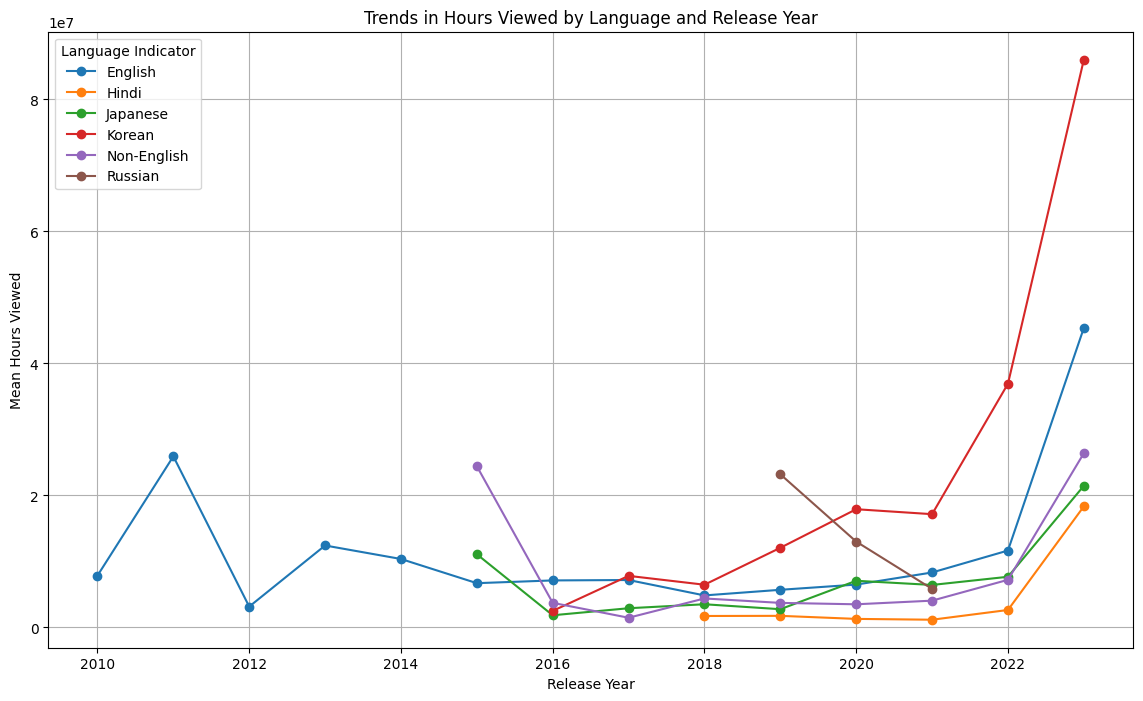

In [57]:
# Plotting the trends for each language
plt.figure(figsize=(14, 8))
for language in yearly_language_trends['Language Indicator'].unique():
    language_data = yearly_language_trends[yearly_language_trends['Language Indicator'] == language]
    plt.plot(language_data['Release Year'], language_data['Hours Viewed'], marker='o', linestyle='-', label=language)

plt.xlabel('Release Year')
plt.ylabel('Mean Hours Viewed')
plt.title('Trends in Hours Viewed by Language and Release Year')
plt.legend(title='Language Indicator')
plt.grid(True)
plt.show()

> English Content: Starts from 2010, experiencing an initial increase to an average mean of 2.3! Japanese and Non-English Content: Both begin from 2015! Korean Content: Starts in 2016 with around 0.3 and shows a consistent increase each year, reaching over 8 average hours viewed in 2023. Hindi Content: Begins in 2018 with a steady average of 0.2 until 2022, then jumps to 1.7 in 2023.  
These trends highlight the rapid rise in viewership for Korean content, especially in 2023, which may suggest a strong increase in popularity or the release of highly engaging content. English, Japanese, and Non-English content also see notable increases in 2023, indicating a broader trend of rising engagement across multiple languages!